# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

Найдем производную:

$f'(x) = \arctan x + x\frac{1}{1 + x^2} - \frac{1}{1 + x^2} \cdot x = \arctan x$

Найдем вторую производную:

$f''(x) = \frac{1}{1 + x^2}$

Чтобы метод сходился $x^* = 0$ должен лежать в $\frac{2L}{3M}$ окрестности $x^{0}$.

$L$ - это число, равное второй производной в точке оптимума, то есть L = 1.

$M$ - это старшое с.з. третьей производной, то есть $M = \max f'''(x) = \max(-\frac{2x}{(1 + x^2)^2}) = \frac{3\sqrt{3}}{8} \approx 0.65$.

Тогда метод сходится, при $|x^0| < 1.02$.
Это достаточное условие, то есть при $|x^0| < 1.02$ метод гарантированно сойдется. Как увидим далее, в точке $x^0 = 1.3$ метод сходится, а в точке $x^0 = 1.5$ - нет

In [1]:
import numpy as np
from numpy import linalg
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import math
import pandas as pd
from datetime import datetime
from scipy.spatial import distance
import re
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import ortho_group
m = ortho_group.rvs(dim=3)
from sklearn import ensemble, model_selection, metrics, tree
%matplotlib inline
from sklearn.datasets import load_digits
import time

In [2]:
def func(x):
    return x*np.arctan(x) - 1/2*np.log(1 + x**2)
def gradient(x):
    return np.arctan(x)
def gessian(x):
    return 1/(1 + x**2)

L = 1
M = 0.65

In [3]:
def GD(start, lr, amount_of_iterations):
    x = start
    criterion = []
    for i in range(amount_of_iterations):
        grad = gradient(x)
        x = x - lr*grad
        criterion.append(grad)
    return criterion

In [4]:
gradient_descent1 = GD(1.3, 1/L, 10)
gradient_descent2 = GD(1.5, 1/L, 10)

In [5]:
def Newton(start, lr, amount_of_iterations):
    x = start
    criterion = []
    for i in range(amount_of_iterations):
        grad = gradient(x)
        x = x - lr*gessian(x)**(-1)*grad
        criterion.append(abs(grad))
    return criterion

In [6]:
newton1 = Newton(1.3, 1/L, 10)
newton2 = Newton(1.5, 1/L, 10)

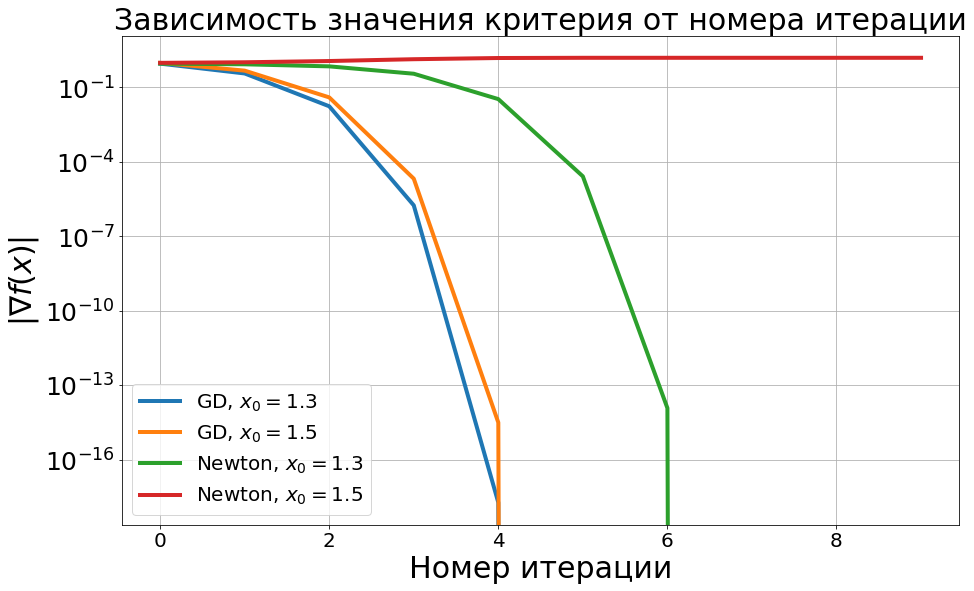

In [7]:
plt.figure(figsize=(15, 9))

plt.semilogy(np.arange(0, 10, 1), gradient_descent1, linewidth=4, label = r"GD, $x_0 = 1.3$")
plt.semilogy(np.arange(0, 10, 1), gradient_descent2, linewidth=4, label = r"GD, $x_0 = 1.5$")
plt.semilogy(np.arange(0, 10, 1), newton1, linewidth=4, label = r"Newton, $x_0 = 1.3$")
plt.semilogy(np.arange(0, 10, 1), newton2, linewidth=4, label = r"Newton, $x_0 = 1.5$")


plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Номер итерации", fontsize=30)
plt.ylabel(r"$|\nabla f(x)|$", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)


plt.grid(True)

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

In [8]:
def Newton_Armijo(start, lr, amount_of_iterations):    
    x = start
    criterion = []
    theta = 0.9
    eps = 0.3
    for i in range (amount_of_iterations):
        grad = gradient(x)
        while (func(x - lr*gessian(x)**(-1)*grad) >= func(x) - eps*lr*grad**2*gessian(x)**(-1)):
            lr = lr*theta
        x = x - lr*gessian(x)**(-1)*grad
        criterion.append(abs(grad))
    return criterion

In [9]:
newton_armijo = Newton_Armijo(1.5, 1/L, 30)

Итерация кубического метода:

$x^{k  + 1} = \arg\underset{x \in \mathbb{R}}{\min}(f(x^k) + <\nabla f(x^k), x - x^k> + \frac{1}{2} <x - x^k, \nabla^2 f(x^k)(x - x^k)> + \frac{M}{6}||x^k - x||^3)$

Берем производную, из двух решений квадратного уравнения выбираем такое, что $x^{k + 1} < x^k$:

$x^{k + 1} = x^k - \frac{\sqrt{(\nabla^2f(x^k))^2 + 2M\nabla f(x^k}) - \nabla^2f(x^k)}{M}$

In [10]:
def Newton_Cube(start, lr, amount_of_iterations):
    x = start
    criterion = []
    for i in range(amount_of_iterations):
        grad = gradient(x)
        gess = gessian(x)
        criterion.append(abs(grad))
        x = x - 1/M * (np.sqrt(gess**2 + 2 * M * grad) - gess)
    return criterion

In [11]:
newton_cube = Newton_Cube(1.5, 1/L, 30)

In [12]:
def Newton_increasing_step(start, lr, amount_of_iterations):
    x = start
    criterion = []
    for i in range(amount_of_iterations):
        lr = (np.log(i + 2))**0.5
        grad = gradient(x)
        x = x - lr*gessian(x)**(-1)*grad
        criterion.append(abs(grad))
    return criterion

In [13]:
newton_inc_step = Newton_increasing_step(1.5, 1/L, 30)

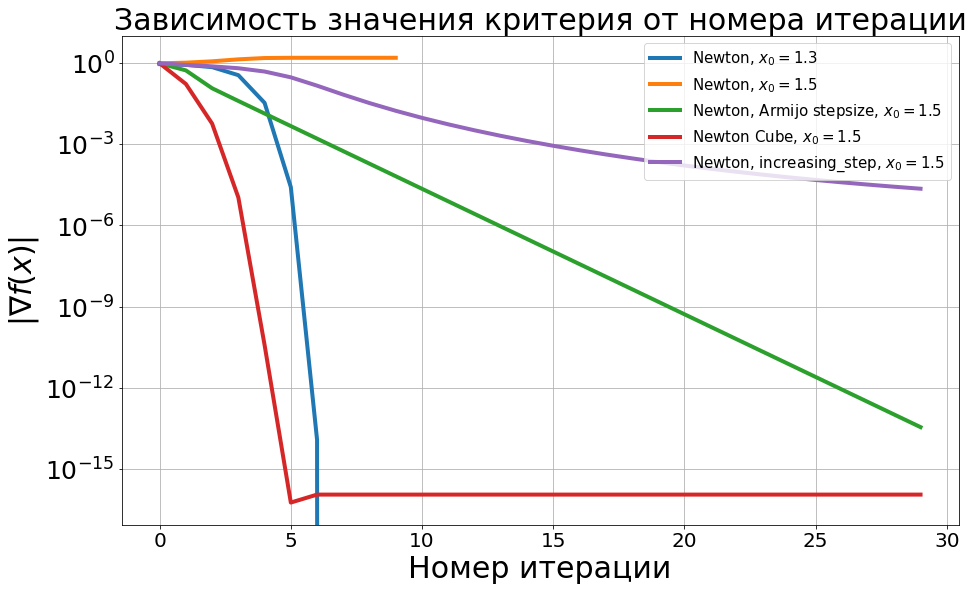

In [14]:
plt.figure(figsize=(15, 9))

plt.semilogy(np.arange(0, 10, 1), newton1, linewidth=4, label = r"Newton, $x_0 = 1.3$")
plt.semilogy(np.arange(0, 10, 1), newton2, linewidth=4, label = r"Newton, $x_0 = 1.5$")
plt.semilogy(np.arange(0, 30, 1), newton_armijo, linewidth=4, label = r"Newton, Armijo stepsize, $x_0 = 1.5$")
plt.semilogy(np.arange(0, 30, 1), newton_cube, linewidth=4, label = r"Newton Cube, $x_0 = 1.5$")
plt.semilogy(np.arange(0, 30, 1), newton_inc_step, linewidth=4, label = r"Newton, increasing_step, $x_0 = 1.5$")

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Номер итерации", fontsize=30)
plt.ylabel(r"$|\nabla f(x)|$", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)


plt.grid(True)

Вывод: демпфированный и кубический методы Ньютона решают проблему сходимости в данной задачи. Особенно хорошо справляется кубический метод Ньютона.

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

In [15]:
dataset = "mushrooms.txt"

data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
N, d = X.shape

y = 2*y - 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
N_train, d_train = X_train.shape
N_test, d_test = X_test.shape

In [16]:
L = 1/(2*N_train)*max(np.linalg.eigvalsh(X_train@X_train.T))
print("L = ", L)
lamb = L/100

L =  5.169277725744606


In [17]:
def func(X, y, omega):
    S = 0
    for i in range(N_train):
        expon = np.exp(-omega.T@(X[i]*y[i]))
        S += np.log(1 + expon)
    return 1/N_train*S + lamb * (np.linalg.norm(omega))**2

def gradient(X, y, omega):
    S = 0
    for i in range(N_train):
        expon = np.exp(-omega.T@(X[i]*y[i]))
        S += X[i]*expon/(1+expon)*y[i]
    return -1/N_train*S + 2 * lamb * omega

def hessian(X, y, omega):
    S = 0
    for i in range(N_train):
        expon = np.exp(-omega.T@(X[i]*y[i]))
        S += expon* (X[i].T*X[i]/(1+expon))**2
    return 1/N_train*S + 2 * lamb * np.eye(d)

In [18]:
def Newton_and_GD(X, y, start, lr, amount_of_iterations):
    omega = start
    grad = gradient(X, y, omega)
    start_newton = np.linalg.norm(grad)
    criterion = []
    k = 0
    while(start_newton > 1e-4):
        grad = gradient(X, y, omega)
        start_newton = np.linalg.norm(grad)
        criterion.append(start_newton)
        omega = omega - lr * grad
    while(criterion[len(criterion) - 1] > 1e-5):
        grad = gradient(X, y, omega)
        criterion.append(np.linalg.norm(grad))
        omega = omega - np.linalg.inv(hessian(X, y, omega)) @ grad
        k += 1
    return criterion

In [19]:
newton_gd = Newton_and_GD(X_train, y_train, np.zeros(d), 1/L, 50)

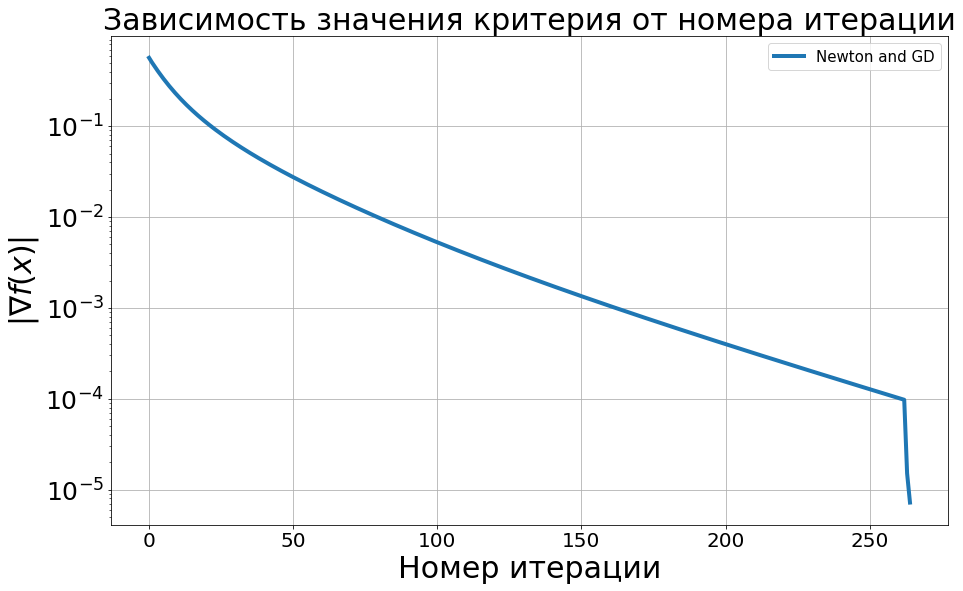

In [20]:
plt.figure(figsize=(15, 9))

plt.semilogy(np.arange(0, len(newton_gd), 1), newton_gd, linewidth=4, label = "Newton and GD")

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Номер итерации", fontsize=30)
plt.ylabel(r"$|\nabla f(x)|$", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)


plt.grid(True)

В начале использовали обычный градиентный спуск, чтобы достигнуть некоторой небольшой точности, а потом, попав в окрестность решения использовали метод Ньютона, который быстро набрал более высокую точность решения.

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [21]:
def precisions(omega):
    number_of_true_precisions = 0
    for i in range (N_test): 
        if (omega@X_test[i] >= 0):
            k = 1
        else:
            k = -1
        if (k == y_test[i]):
            number_of_true_precisions = number_of_true_precisions + 1   
    procent_of_precisions = number_of_true_precisions/y_test.shape[0]
    return procent_of_precisions, number_of_true_precisions

In [22]:
def Broyden(X, y, start, amount_of_iterations):
    omega = start
    hess = hessian(X, y, omega)
    grad = gradient(X, y, omega)
    criterion = []
    accuracy = []
    for i in range(amount_of_iterations):
        criterion.append(np.linalg.norm(grad))
        accuracy.append(precisions(omega)[0])
        omega_prev = omega
        omega = omega - hess @ grad
        s = omega - omega_prev
        grad_prev = grad
        grad = gradient(X, y, omega)
        y1 = grad - grad_prev
        q = s - hess @ y1
        mu = 1/(q.T @ y1)
        hess = hess + mu * np.outer(q, q.T)
    return criterion, accuracy

In [23]:
broyden = Broyden(X_train, y_train, np.zeros(d), 50)

In [24]:
def DFP(X, y, start, amount_of_iterations):
    omega = start
    hess = hessian(X, y, omega)
    grad = gradient(X, y, omega)
    criterion = []
    accuracy = []
    for i in range(amount_of_iterations):
        criterion.append(np.linalg.norm(grad))
        accuracy.append(precisions(omega)[0])
        omega_prev = omega
        omega = omega - hess @ grad
        s = omega - omega_prev
        grad_prev = grad
        grad = gradient(X, y, omega)
        y1 = grad - grad_prev
        mu1 = 1/(s.T @ y1)
        mu2 = -1/((hess@y1).T @ y1)
        hess = hess + mu1 * np.outer(s, s.T) + mu2 * np.outer(hess@y1, (hess@y1).T)
    return criterion, accuracy

In [25]:
dfp = DFP(X_train, y_train, np.zeros(d), 50)

In [26]:
def Wolfe_conditions(X, y, omega, lr, c1, c2, p, grad):
    return ((func(X, y, omega + lr*p) <= func(X, y, omega) + c1*lr*grad.T@p) or (gradient(X, y, omega + lr*p).T@p >= c2*grad.T@p))


def BFGS(X, y, start, lr, c1, c2, amount_of_iterations):
    omega = start
    hess = hessian(X, y, omega)
    grad = gradient(X, y, omega)
    criterion = []
    accuracy = []
    theta = 0.5
    for i in range(amount_of_iterations):
        criterion.append(np.linalg.norm(grad))
        accuracy.append(precisions(omega)[0])
        
        p = -hess @ grad
        while(not (Wolfe_conditions(X, y, omega, lr, c1, c2, p, grad))):
            lr = lr*theta
            
        omega_prev = omega
        omega = omega + lr*p
        s = omega - omega_prev
        grad_prev = grad
        grad = gradient(X, y, omega)
        y1 = grad - grad_prev
        rho = 1/(y1.T @ s)
        I = np.eye(hess.shape[0])
        hess = (I - rho*np.outer(s, y1.T))@hess@(I - rho*np.outer(y1, s.T)) + rho*np.outer(s, s.T)
    return criterion, accuracy

In [27]:
bfgs = BFGS(X_train, y_train, np.zeros(d), 1, 0.01, 0.9, 50)

In [28]:
def L_BFGS(X, y, start, lr, c1, c2, m, amount_of_iterations):
    omega = start
    hess0 = hessian(X, y, omega)
    hess = hess0
    grad = gradient(X, y, omega)
    criterion = []
    accuracy = []
    s_arr = []
    y1_arr = []
    rho_arr = []
    theta = 0.5
    for i in range(amount_of_iterations):
        criterion.append(np.linalg.norm(grad))
        accuracy.append(precisions(omega)[0])
        
        p = -hess @ grad
        while(not (Wolfe_conditions(X, y, omega, lr, c1, c2, p, grad))):
            lr = lr*theta
            
        omega_prev = omega
        omega = omega + lr*p
        s = omega - omega_prev
        s_arr.append(s)
        if (len(s_arr) > m):
            s_arr.pop(0)
        grad_prev = grad
        grad = gradient(X, y, omega)
        y1 = grad - grad_prev
        y1_arr.append(y1)
        if (len(y1_arr) > m):
            y1_arr.pop(0)
        rho = 1/(y1.T @ s)
        rho_arr.append(rho)
        if (len(rho_arr) > m):
            rho_arr.pop(0)
            
        hess1 = hess0
        I = np.eye(hess.shape[0])
        m1 = min(i + 1, m)
        mult  = np.eye(hess.shape[0])
        for j in range(m1):
            V = (I - rho_arr[j] * np.outer(y1_arr[j], s_arr[j].T))
            mult = mult @ V
        hess1 = mult.T@hess1@mult
        
        for j in range(1, m1):
            cur = rho_arr[j - 1] * np.outer(s_arr[j - 1], s_arr[j - 1].T)
            mult  = np.eye(hess.shape[0])
            for k in range(j, m1):
                V = (I - rho_arr[k] * np.outer(y1_arr[k], s_arr[k].T))
                mult = mult @ V
            cur = mult.T@cur@mult
            hess1 = hess1 + cur
    
        hess = hess1 + rho_arr[m1 - 1]*np.outer(s_arr[m1 - 1], s_arr[m1 - 1].T)

    return criterion, accuracy

In [29]:
l_bfgs = L_BFGS(X_train, y_train, np.zeros(d), 1, 0.01, 0.9, 30, 50)

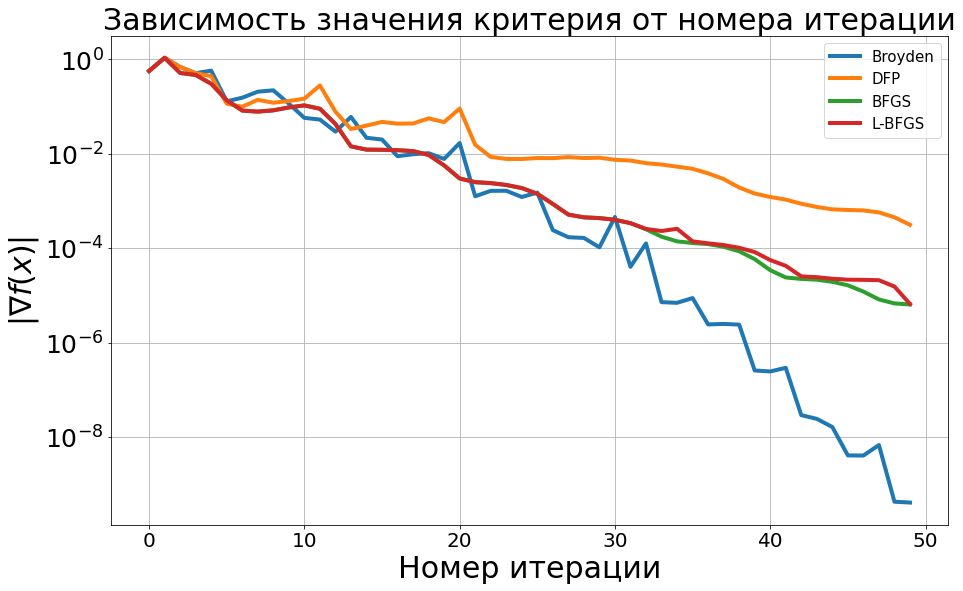

In [30]:
plt.figure(figsize=(15, 9))

plt.semilogy(np.arange(0, 50, 1), broyden[0], linewidth=4, label = "Broyden")
plt.semilogy(np.arange(0, 50, 1), dfp[0], linewidth=4, label = "DFP")
plt.semilogy(np.arange(0, 50, 1), bfgs[0], linewidth=4, label = "BFGS")
plt.semilogy(np.arange(0, 50, 1), l_bfgs[0], linewidth=4, label = "L-BFGS")

plt.legend(loc="best", fontsize=15)
plt.xlabel(r"Номер итерации", fontsize=30)
plt.ylabel(r"$|\nabla f(x)|$", fontsize=30)
plt.title(r"Зависимость значения критерия от номера итерации", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)


plt.grid(True)

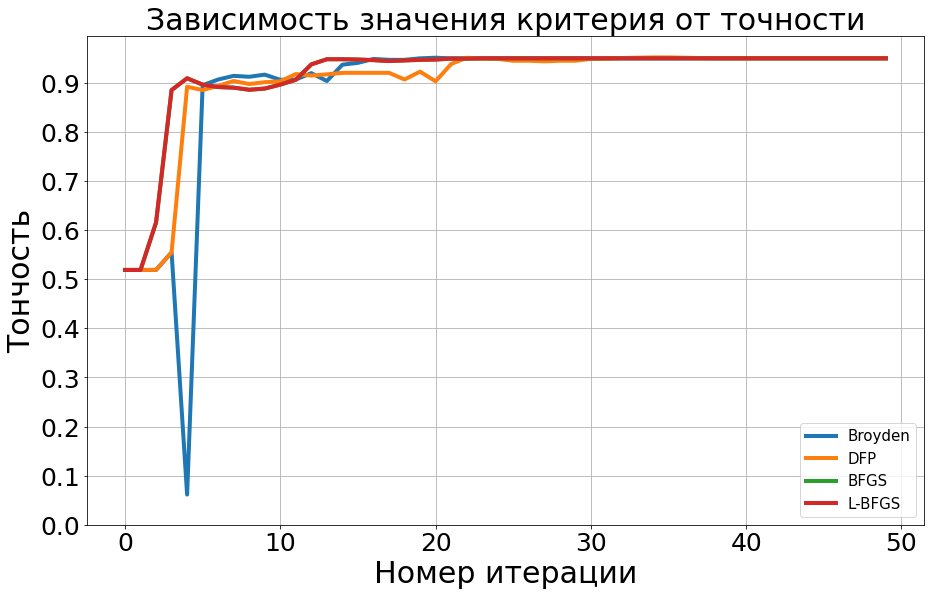

In [34]:
plt.figure(figsize=(15, 9))

plt.plot(np.arange(0, 50, 1), broyden[1], linewidth=4, label = "Broyden")
plt.plot(np.arange(0, 50, 1), dfp[1], linewidth=4, label = "DFP")
plt.plot(np.arange(0, 50, 1), bfgs[1], linewidth=4, label = "BFGS")
plt.plot(np.arange(0, 50, 1), l_bfgs[1], linewidth=4, label = "L-BFGS")

plt.legend(loc="best", fontsize=15)
plt.xlabel(r"Номер итерации", fontsize=30)
plt.ylabel(r"Тончость", fontsize=30)
plt.title(r"Зависимость значения критерия от точности", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(np.arange(0, 1, 0.1), fontsize=25)


plt.grid(True)

Вывод: Лучшую сходимость показал Broyden. BFGS, L-BFGS и DFP сходятся чуть хуже, но тоже хорошо. В плане точности, все методы показали высокую точность, порядка 95%. Быстрее всех достигли этой точности BFGS и L-BFGS.

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [32]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [33]:
#ответ